In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [44]:
# Load the dataset
data = pd.read_excel("Taiwan Data Set.xlsx")

In [45]:
# Renaming the columns
data.columns = [
    "ID",
    "Credit Amount",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "Payment Status September 2005",
    "Payment Status August 2005",
    "Payment Status July 2005",
    "Payment Status June 2005",
    "Payment Status May 2005",
    "Payment Status April 2005",
    "Amount of Bill Statement in September 2005",
    "Amount of Bill Statement in August 2005",
    "Amount of Bill Statement in July 2005",
    "Amount of Bill Statement in June 2005",
    "Amount of Bill Statement in May 2005",
    "Amount of Bill Statement in April 2005",
    "Amount Paid in September 2005",
    "Amount Paid in August 2005",
    "Amount Paid in July 2005",
    "Amount Paid in June 2005",
    "Amount Paid in May 2005",
    "Amount Paid in April 2005",
    "default payment next month"
]

In [77]:
# Display the first few rows of the dataframe
print(data.head())

   ID  Credit Amount  SEX  EDUCATION  MARRIAGE  AGE  \
0   1          20000    2          2         1   24   
1   2         120000    2          2         2   26   
2   3          90000    2          2         2   34   
3   4          50000    2          2         1   37   
4   5          50000    1          2         1   57   

  Payment Status September 2005 Payment Status August 2005  \
0                           NaN                        NaN   
1                           NaN                        NaN   
2                           NaN                        NaN   
3                           NaN                        NaN   
4                           NaN                        NaN   

  Payment Status July 2005 Payment Status June 2005  ...  \
0                      NaN                      NaN  ...   
1                      NaN                      NaN  ...   
2                      NaN                      NaN  ...   
3                      NaN                      NaN  ...

In [54]:
# Basic statistics of numerical attributes
print(data.describe())

                 ID   Credit Amount           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE  Payment Status September 2005  \
count  30000.000000                   30000.000000   
mean      35.485500                      -0.016700   
std        9.217904                       1.123802   
min       21.000000                      -2.000000   


In [55]:
# Check for missing values
print(data.isnull().sum())

ID                                            0
Credit Amount                                 0
SEX                                           0
EDUCATION                                     0
MARRIAGE                                      0
AGE                                           0
Payment Status September 2005                 0
Payment Status August 2005                    0
Payment Status July 2005                      0
Payment Status June 2005                      0
Payment Status May 2005                       0
Payment Status April 2005                     0
Amount of Bill Statement in September 2005    0
Amount of Bill Statement in August 2005       0
Amount of Bill Statement in July 2005         0
Amount of Bill Statement in June 2005         0
Amount of Bill Statement in May 2005          0
Amount of Bill Statement in April 2005        0
Amount Paid in September 2005                 0
Amount Paid in August 2005                    0
Amount Paid in July 2005                

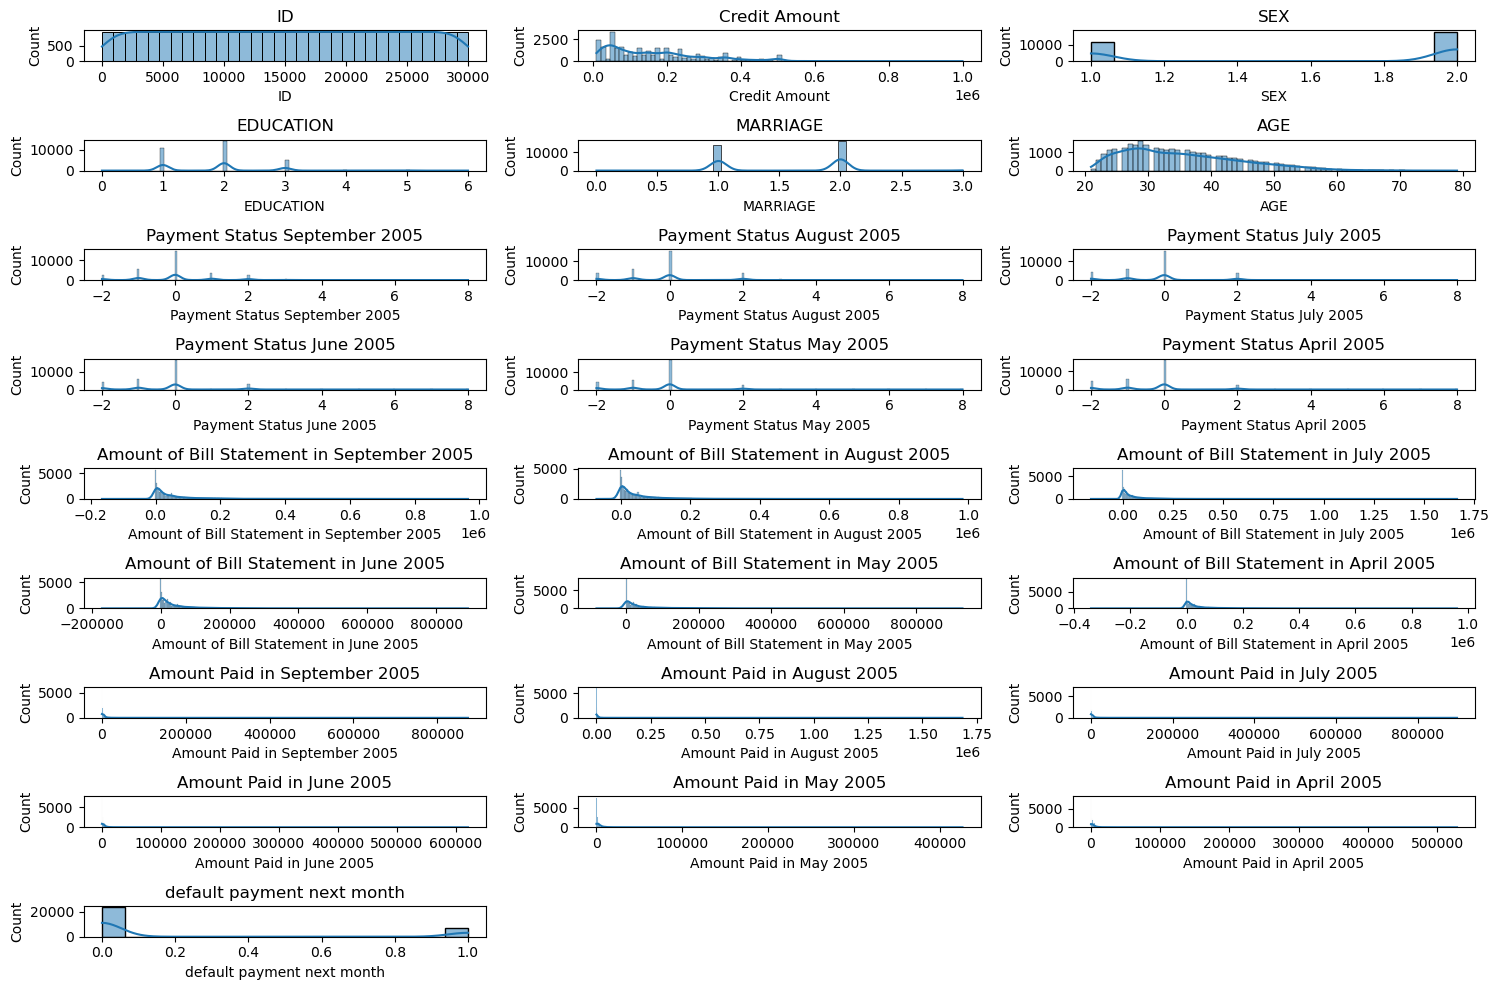

In [51]:
# Visualize the distribution of numerical attributes
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
num_numerical_cols = len(numerical_columns)
num_rows = (num_numerical_cols + 2) // 3  # Adding 2 to ensure at least 1 row for 0 or 1 columns
num_cols = min(num_numerical_cols, 3)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

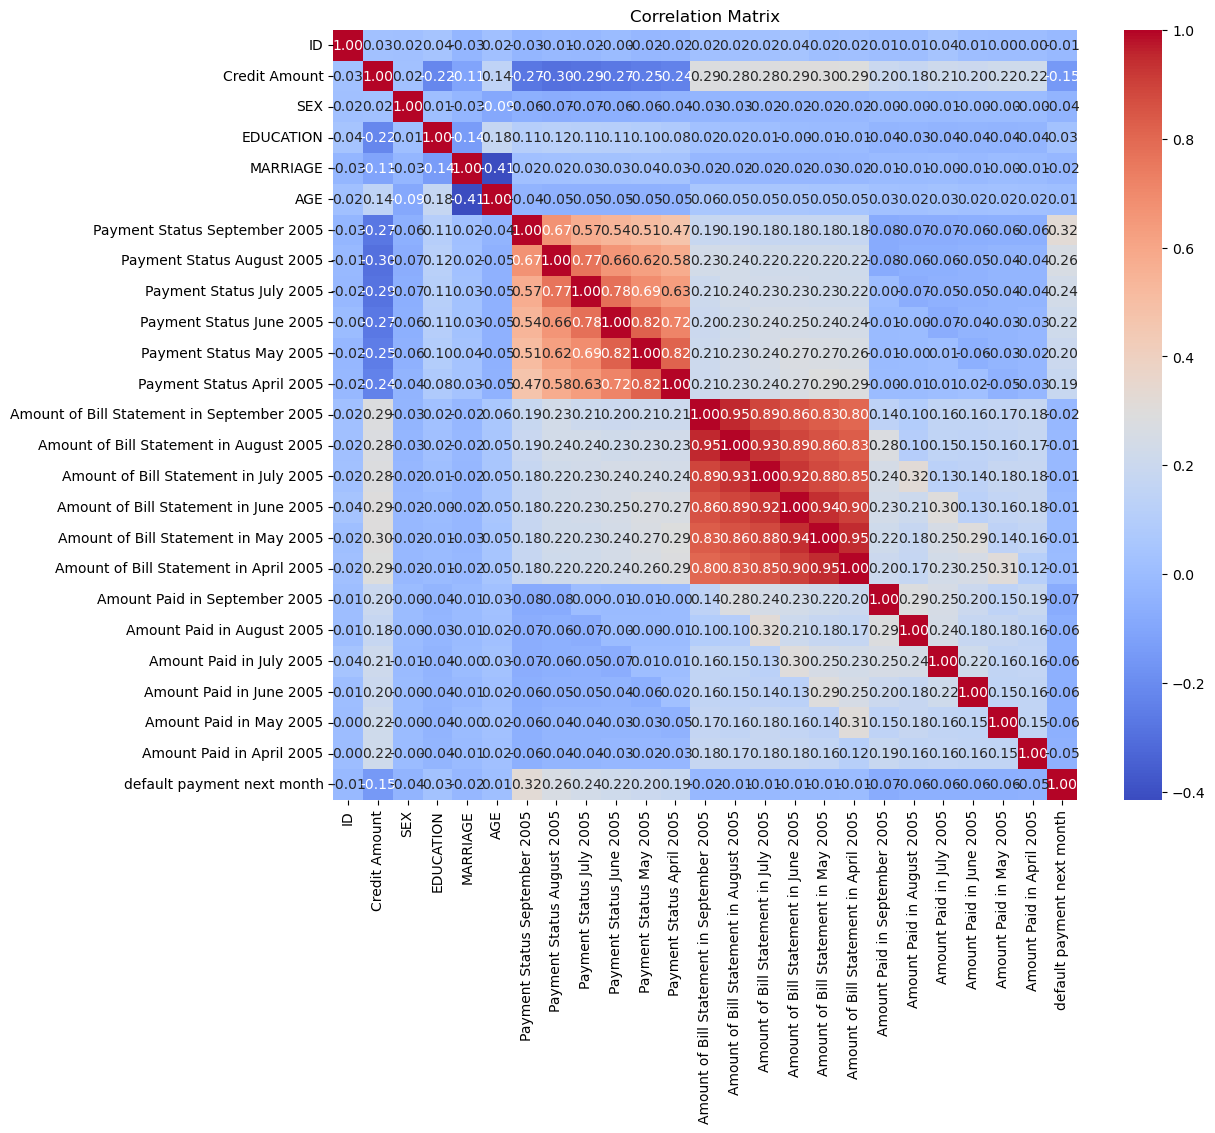

In [60]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [61]:
# Interpret the correlation matrix
print("Interpretation of the correlation matrix:")
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j:  # To avoid duplicate pairs and the diagonal
            correlation = correlation_matrix.iloc[i, j]
            if correlation > 0.7:
                print(f"The correlation between {col1} and {col2} is high ({correlation:.2f})")
            elif correlation < -0.7:
                print(f"The correlation between {col1} and {col2} is highly negative ({correlation:.2f})")
            elif correlation > 0.5:
                print(f"The correlation between {col1} and {col2} is moderate ({correlation:.2f})")
            elif correlation < -0.5:
                print(f"The correlation between {col1} and {col2} is moderately negative ({correlation:.2f})")
            else:
                print(f"The correlation between {col1} and {col2} is low ({correlation:.2f})")

Interpretation of the correlation matrix:
The correlation between ID and Credit Amount is low (0.03)
The correlation between ID and SEX is low (0.02)
The correlation between ID and EDUCATION is low (0.04)
The correlation between ID and MARRIAGE is low (-0.03)
The correlation between ID and AGE is low (0.02)
The correlation between ID and Payment Status September 2005 is low (-0.03)
The correlation between ID and Payment Status August 2005 is low (-0.01)
The correlation between ID and Payment Status July 2005 is low (-0.02)
The correlation between ID and Payment Status June 2005 is low (-0.00)
The correlation between ID and Payment Status May 2005 is low (-0.02)
The correlation between ID and Payment Status April 2005 is low (-0.02)
The correlation between ID and Amount of Bill Statement in September 2005 is low (0.02)
The correlation between ID and Amount of Bill Statement in August 2005 is low (0.02)
The correlation between ID and Amount of Bill Statement in July 2005 is low (0.02)
Th

In [65]:
# Define features and target variable
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

In [68]:
# Replace encoded values with corresponding descriptions
payment_status_key = {
    -2: 'unknown',
    -1: 'pay duly',
    0: 'unknown',
    1: 'payment delay for one month',
    2: 'payment delay for two months',
    3: 'payment delay for three months',
    4: 'payment delay for four months',
    5: 'payment delay for five months',
    6: 'payment delay for six months',
    7: 'payment delay for seven months',
    8: 'payment delay for eight months',
    9: 'payment delay for nine months and above'
}

In [71]:
# Replace encoded values with descriptions
for col in data.columns[6:12]:
    data[col] = data[col].map(payment_status_key)


In [72]:
# Define features and target variable
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

In [73]:
# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)

In [76]:
# Check for negative values after one-hot encoding and replace them with their absolute values
if (X < 0).any().any():
    X = X.abs()

In [78]:
# Perform feature selection using chi-squared test
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

In [79]:
# Get scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [80]:
# Concatenate dataframes
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']

In [81]:
# Display the best features
print(feature_scores.nlargest(10, 'Score'))

                                       Feature         Score
1                                Credit Amount  7.106584e+07
13                  Amount Paid in August 2005  9.229476e+06
12               Amount Paid in September 2005  7.728847e+06
14                    Amount Paid in July 2005  5.630969e+06
17                   Amount Paid in April 2005  5.141638e+06
15                    Amount Paid in June 2005  4.926667e+06
16                     Amount Paid in May 2005  4.433484e+06
6   Amount of Bill Statement in September 2005  1.252753e+06
7      Amount of Bill Statement in August 2005  6.367044e+05
8        Amount of Bill Statement in July 2005  5.998673e+05


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [83]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Define and fit the logistic regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [85]:
# Get the coefficients (feature importances) for each class
coefficients = model.coef_

In [87]:
# Map coefficients to feature names
feature_coefficients = {}
for i, class_label in enumerate(model.classes_):
    class_coefficients = {feature: coef for feature, coef in zip(X.columns, coefficients[0])}
    feature_coefficients[class_label] = class_coefficients

In [88]:
# Print feature coefficients for each class
for class_label, coefficients in feature_coefficients.items():
    print(f"Default Payment: {class_label}")
    sorted_coefficients = sorted(coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
    for feature, coef in sorted_coefficients:
        print(f"{feature}: {coef}")
    print()

Default Payment: 0
SEX: -0.18727938492596663
MARRIAGE: -0.1670914991464146
EDUCATION: -0.06182112026856172
AGE: 0.00625543718688934
Amount Paid in September 2005: -2.1057363963504072e-05
Amount Paid in August 2005: -1.8955799411622443e-05
Amount of Bill Statement in September 2005: -7.235498756315991e-06
Amount Paid in June 2005: -6.869852106422354e-06
Amount Paid in July 2005: -6.288178236672094e-06
Amount of Bill Statement in August 2005: 4.189436009501032e-06
Amount Paid in May 2005: -3.3753103754179847e-06
Credit Amount: -3.079861731535243e-06
Amount Paid in April 2005: -2.6406197607894392e-06
Amount of Bill Statement in May 2005: 2.5477912969588093e-06
Amount of Bill Statement in July 2005: 2.252016919628193e-06
Amount of Bill Statement in April 2005: 2.0714838369278448e-06
ID: -1.6995957546414346e-06
Amount of Bill Statement in June 2005: 5.850900321461981e-07

Default Payment: 1
SEX: -0.18727938492596663
MARRIAGE: -0.1670914991464146
EDUCATION: -0.06182112026856172
AGE: 0.006255